### Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset 

In [3]:
data = pd.read_csv("C:/Users/Hmz/Desktop/AMD_TRAIN.csv")
data

,date,open,high,low,close,volume
0,3/21/1983,8.9675,9.0300,8.8101,8.9975,510800
1,3/28/1983,8.8426,9.0300,8.6551,8.6851,494800
2,3/29/1983,8.5926,8.8426,8.3427,8.4352,778000
3,4/28/1983,9.3424,9.4349,9.2475,9.3099,266800
4,5/2/1983,9.4049,9.4974,9.2800,9.3724,541200
...,...,...,...,...,...,...
1591,2/22/2022,115.2700,119.2000,113.6100,115.6500,135448856
1592,3/4/2022,112.0000,113.0000,106.8100,108.4100,100512702
1593,3/15/2022,102.6600,109.6900,101.7900,109.3300,112180098
1594,3/28/2022,117.7000,120.4100,116.7100,120.2400,90742648


In [15]:
training_data = data.iloc[:, 4:5].values

In [16]:
training_data

array([[  8.9975],
       [  8.6851],
       [  8.4352],
       ...,
       [109.33  ],
       [120.24  ],
       [ 89.85  ]])

### Feature Scaling 

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_sc = sc.fit_transform(training_data)

### Creating a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
y_train = []
for i in range(60, 1596):
    X_train.append(training_data_sc[i-60:i, 0])
    y_train.append(training_data_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### Building the RNN 

In [8]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [9]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
48/48 [==============================] - 4s 75ms/step - loss: 0.0052
Epoch 2/100
48/48 [==============================] - 3s 69ms/step - loss: 0.0031
Epoch 3/100
48/48 [==============================] - 3s 68ms/step - loss: 0.0024
Epoch 4/100
48/48 [==============================] - 3s 68ms/step - loss: 0.0019
Epoch 5/100
48/48 [==============================] - 3s 72ms/step - loss: 0.0016
Epoch 6/100
48/48 [==============================] - 3s 72ms/step - loss: 0.0020
Epoch 7/100
48/48 [==============================] - 3s 72ms/step - loss: 0.0015
Epoch 8/100
48/48 [==============================] - 3s 68ms/step - loss: 0.0015
Epoch 9/100
48/48 [==============================] - 4s 79ms/step - loss: 0.0016
Epoch 10/100
48/48 [==============================] - 4s 86ms/step - loss: 0.0012
Epoch 11/100
48/48 [==============================] - 4s 90ms/step - loss: 0.0013
Epoch 12/100
48/48 [==============================] - 4s 83ms/step - loss: 0.0013
Epoch 13/100
48/48 [=====

### Prediction 

In [27]:
data_test = pd.read_csv("C:/Users/Hmz/Desktop/AMD_TEST.csv")
test_data = data_test.iloc[:, 4:5]

In [28]:
test_data

,close
0,8.8726
1,8.4352
2,9.4349
3,11.4669
4,11.4344
...,...
1561,119.2200
1562,109.3400
1563,110.5300
1564,93.0600


In [29]:
data_total = pd.concat((data['close'], data_test['close']), axis = 0)

In [30]:
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [44]:
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [50]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [51]:
predicted_stock_price

array([[106.35743  ],
       [ 73.97858  ],
       [ 38.886562 ],
       [ 14.780637 ],
       [  6.6996922],
       [  9.188958 ],
       [ 14.377247 ],
       [ 17.896557 ],
       [ 19.876116 ],
       [ 20.470322 ],
       [ 20.452845 ],
       [ 19.833935 ],
       [ 19.062187 ],
       [ 17.749893 ],
       [ 17.181164 ],
       [ 17.13671  ],
       [ 17.010582 ],
       [ 16.360363 ],
       [ 16.233849 ],
       [ 16.03023  ],
       [ 15.732249 ],
       [ 15.214796 ],
       [ 14.836654 ],
       [ 15.432086 ],
       [ 16.068867 ],
       [ 16.446955 ],
       [ 16.333225 ],
       [ 16.10339  ],
       [ 16.333601 ],
       [ 16.920897 ]], dtype=float32)

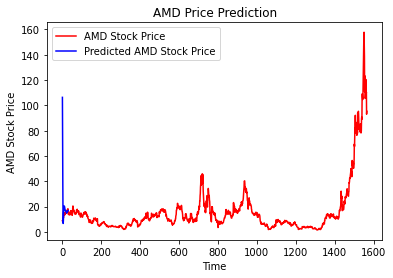

In [52]:
# Visualising the results
plt.plot(test_data, color = 'red', label = 'AMD Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AMD Stock Price')
plt.title('AMD Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()